In [3]:
# Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import data set using pandas
data = pd.read_csv("C:/Users/User/Documents/myprogrames/jupiter/g2gPandas/List of Countries by Sugarcane Production.csv")
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


**UNDERSTANDING YOUR DATA SET**

In [5]:
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB
(103, 7)


**1. There are in total 7 columns in the dataset, however only six columns have relevant observations as regard to the information needed to analyze the dataset** 

**2. There are columns with numerical values classified as OBJECT type instead of numerical types**

**3. There are Nan observations**

**4. The columns title naming convention can be improved**

## Data Cleaning

In [6]:
# drop unnamed column

data = data.drop("Unnamed: 0",axis = 1)

In [7]:
#Checking NAN
data.isna()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
98,False,False,False,False,False,False
99,False,False,False,False,True,True
100,False,False,False,False,False,False
101,False,False,False,False,False,False


In [8]:
data[data.isna().any(axis = 1)]


,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
data = data.dropna().reset_index().drop("index", axis = 1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     102 non-null    object
 1   Continent                   102 non-null    object
 2   Production (Tons)           102 non-null    object
 3   Production per Person (Kg)  102 non-null    object
 4   Acreage (Hectare)           102 non-null    object
 5   Yield (Kg / Hectare)        102 non-null    object
dtypes: object(6)
memory usage: 4.9+ KB


In [11]:
#rename columns
data.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
data.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
data.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
data.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [12]:
data["Production(Tons)"] = data["Production(Tons)"].str.replace(".","")
data["Production_per_person(Kg)"] = data["Production_per_person(Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage(Hectare)"] = data["Acreage(Hectare)"].str.replace(".","")
data["Yield(Kg/Hectare)"]= data["Yield(Kg/Hectare)"].str.replace(".","").str.replace(",",".")

In [13]:
data.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [14]:
# changing numerical values to float type
data["Production(Tons)"] = data["Production(Tons)"].astype(float)
data["Production_per_person(Kg)"] = data["Production_per_person(Kg)"].astype(float)
data["Acreage(Hectare)"] = data["Acreage(Hectare)"].astype(float)
data["Yield(Kg/Hectare)"] = data["Yield(Kg/Hectare)"].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    102 non-null    object 
 1   Continent                  102 non-null    object 
 2   Production(Tons)           102 non-null    float64
 3   Production_per_person(Kg)  102 non-null    float64
 4   Acreage(Hectare)           102 non-null    float64
 5   Yield(Kg/Hectare)          102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


In [16]:
data.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [17]:
data[data["Acreage(Hectare)"].duplicated(keep = False)]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
72,Niger,Africa,216037.0,10064.0,584.0,36989.7
87,Iraq,Asia,1167.0,297.0,584.0,20.0


In [18]:
data[data["Production_per_person(Kg)"].duplicated(keep = False)]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
62,Chad,Africa,455986.0,297.0,4433.0,102867.1
87,Iraq,Asia,1167.0,297.0,584.0,20.0


## Exploratory Data Analysis

In [19]:
plt.style.use('bmh')

In [20]:
data.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [21]:
data.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Check Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-p

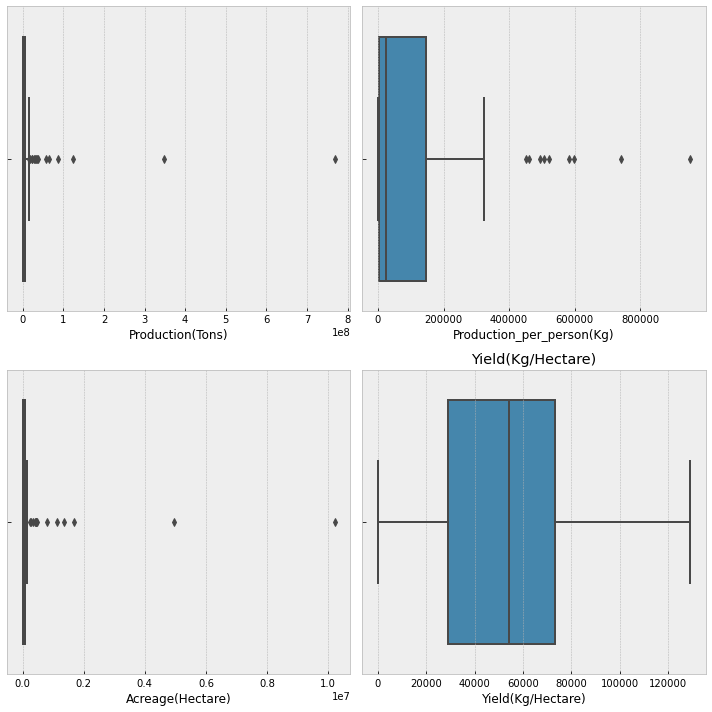

In [22]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data["Production(Tons)"],ax =ax[0,0])
plt.title("Production(Tons)")

sns.boxplot(data["Production_per_person(Kg)"],ax = ax[0,1])
plt.title("Production_per_person(Kg)")

sns.boxplot(data["Acreage(Hectare)"],ax=ax[1,0])
plt.title("Acreage(Hectare)")

sns.boxplot(data["Yield(Kg/Hectare)"],ax = ax[1,1])

plt.tight_layout()
plt.title("Yield(Kg/Hectare)")
plt.show()

**Although there are outliers, the represent important data points hence it is better they remain in the dataset**

### Columns Distribution

## 1. How many countries produce sugar cane by in each continent

In [24]:
data["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

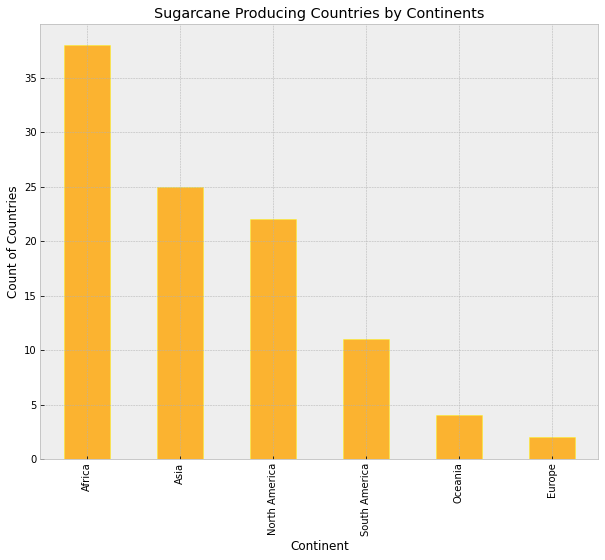

In [25]:
plt.figure(figsize=(10,8))
data["Continent"].value_counts().plot(kind = "bar",color = "orange",edgecolor="yellow",alpha = .8)
plt.ylabel("Count of Countries")
plt.title('Sugarcane Producing Countries by Continents')
plt.show();

**Africa has the most number of countries producing SugarCane**

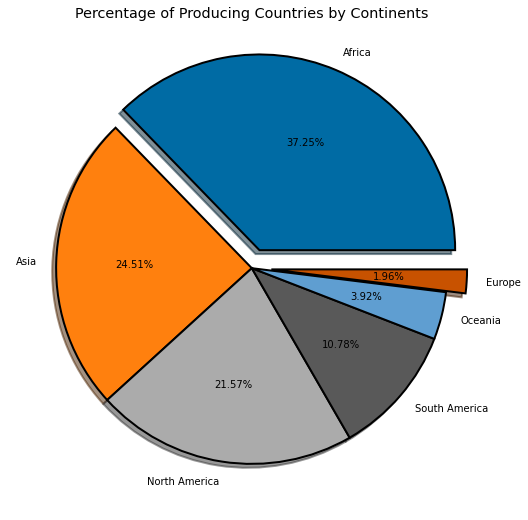

In [26]:
df= data['Continent'].value_counts()

plt.style.use("tableau-colorblind10")
fig = plt.figure(figsize = (10,9))
explode = [.1,0,0,0,0,.1]
plt.pie(df,explode = explode,labels =df.index,shadow=True,autopct = '%2.2f%%', 
        wedgeprops = {'edgecolor' : 'black', 'linewidth' : 2, 'antialiased' : True})
plt.title("Percentage of Producing Countries by Continents")
plt.show;

**37.25 percent of the countries producing sugar cane across all continents are African countries, this represents the highest, while European Countries represent the lowest percentage with 1.96**


### 2. Which Country is the Largest Producer?

In [27]:
data.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [28]:
df = data[["Country","Production(Tons)"]]

df["Production(Tons)_percent"] = df["Production(Tons)"]*100/df["Production(Tons)"].sum()
df

<ipython-input-28-ea1e9dd1a47e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Production(Tons)_percent"] = df["Production(Tons)"]*100/df["Production(Tons)"].sum()


,Country,Production(Tons),Production(Tons)_percent
0,Brazil,768678382.0,4.072729e+01
1,India,348448000.0,1.846200e+01
2,China,123059739.0,6.520138e+00
3,Thailand,87468496.0,4.634389e+00
4,Pakistan,65450704.0,3.467809e+00
...,...,...,...
97,Spain,394.0,2.087551e-05
98,Lebanon,97.0,5.139401e-06
99,Singapore,50.0,2.649176e-06
100,Samoa,12.0,6.358022e-07


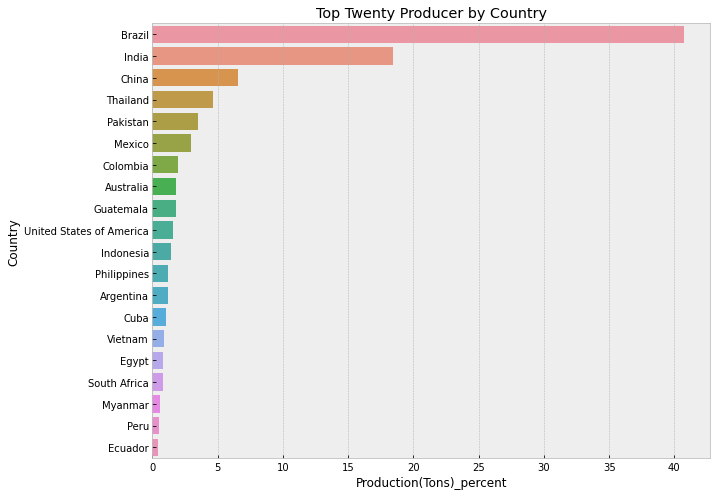

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(y = "Country", x= "Production(Tons)_percent",data = df.head(20),orient = "h")
plt.title("Top Twenty Producer by Country")
plt.show();

**Brazil is the largest producer of SugarCane**

### 3. What Continent produce largest amount of SugarCane

In [30]:
df = data[["Continent","Production(Tons)"]]

df["Production(Tons)_percent"] = df["Production(Tons)"]*100/df["Production(Tons)"].sum()
df

<ipython-input-30-e5d1afe79bda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Production(Tons)_percent"] = df["Production(Tons)"]*100/df["Production(Tons)"].sum()


,Continent,Production(Tons),Production(Tons)_percent
0,South America,768678382.0,4.072729e+01
1,Asia,348448000.0,1.846200e+01
2,Asia,123059739.0,6.520138e+00
3,Asia,87468496.0,4.634389e+00
4,Asia,65450704.0,3.467809e+00
...,...,...,...
97,Europe,394.0,2.087551e-05
98,Asia,97.0,5.139401e-06
99,Asia,50.0,2.649176e-06
100,Oceania,12.0,6.358022e-07


In [31]:
df_cont = df[["Continent","Production(Tons)_percent"]].groupby("Continent").sum().sort_values(by="Production(Tons)_percent")
df_cont

,Production(Tons)_percent
Continent,
Europe,0.000309
Oceania,1.916815
Africa,4.751640
North America,9.218918
Asia,38.250414
South America,45.861905


<Figure size 1080x720 with 0 Axes>

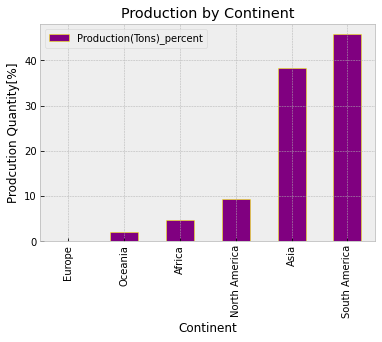

In [32]:
plt.figure(figsize=(15,10))
df_cont.plot(kind = "bar",color = "purple",edgecolor="yellow",alpha = 1.0)
plt.ylabel("Prodcution Quantity[%]")
plt.title('Production by Continent')
plt.show();

**Of the continents , sugarcane production is most popular in South America, while Asia is not far Behind. Europe prodcuces the least**

### 4.Which country cultivates highest land?

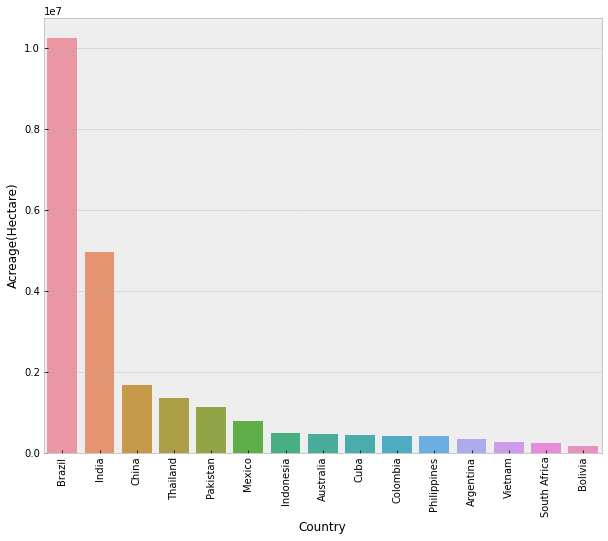

In [33]:
plt.figure(figsize=(10,8))
df_acr = data.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show();

**Brazil Culitvates largest land for Sugarcane Production**

### 5. Which country has highest yield per hectare?

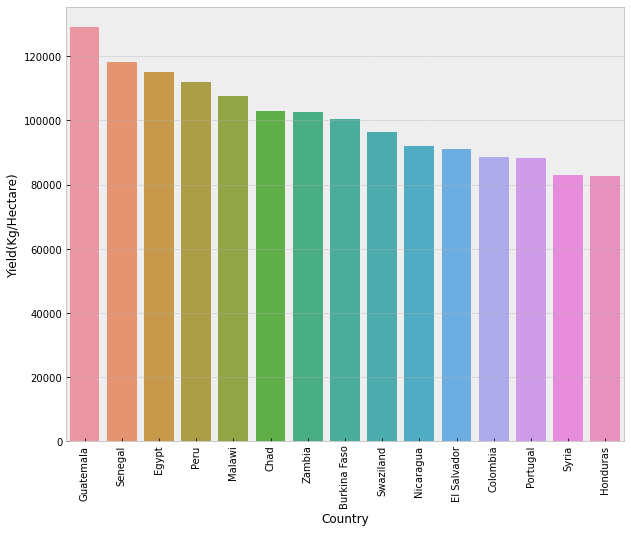

In [34]:
plt.figure(figsize=(10,8))
df_yield = data.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

**Guatemela has highest yield per hectare**

### Which country has highest production per person?

In [35]:
data.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


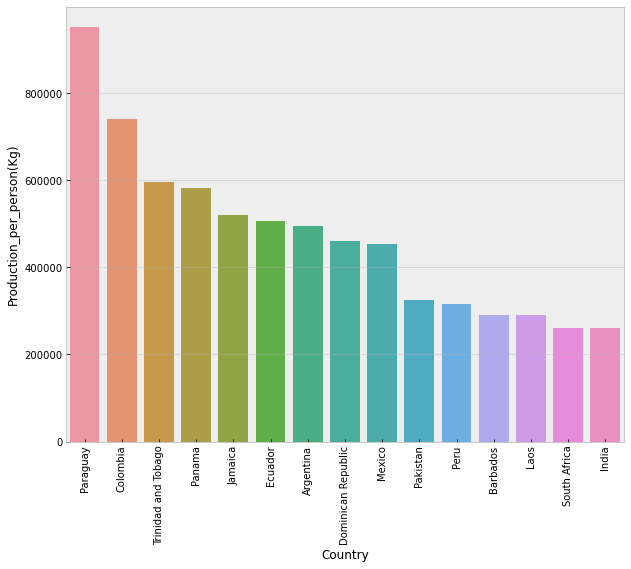

In [36]:
plt.figure(figsize=(10,8))
df_yield = data.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Correlations

In [37]:
dfnum= data.select_dtypes(include=[np.number])
dfnum

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,768678382.0,3668.531,10226205.0,75167.5
1,348448000.0,260721.000,4950000.0,70393.5
2,123059739.0,88287.000,1675215.0,73459.1
3,87468496.0,1264.303,1336575.0,65442.2
4,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...
97,394.0,8.000,9.0,43596.5
98,97.0,16.000,3.0,28386.4
99,50.0,9.000,2.0,25.0
100,12.0,6.000,1.0,11949.8


In [38]:
dfnum.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


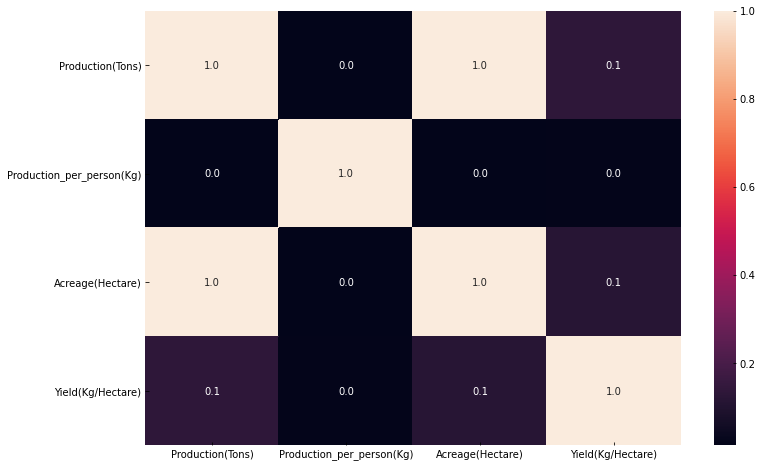

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(dfnum.corr(),annot= True, fmt = ".1f")
plt.show();

### Do Continents with highest land produce more sugarcane? 

In [40]:
continents=data["Continent"].unique()

print(continents)
color_map={'South America':"red",
          "Asia":"blue",
          "North America":"green","Oceania":"yellow","Africa":"black",
          "Europe":"purple"}
colors = data["Continent"].map(color_map)



['South America' 'Asia' 'North America' 'Oceania' 'Africa' 'Europe']


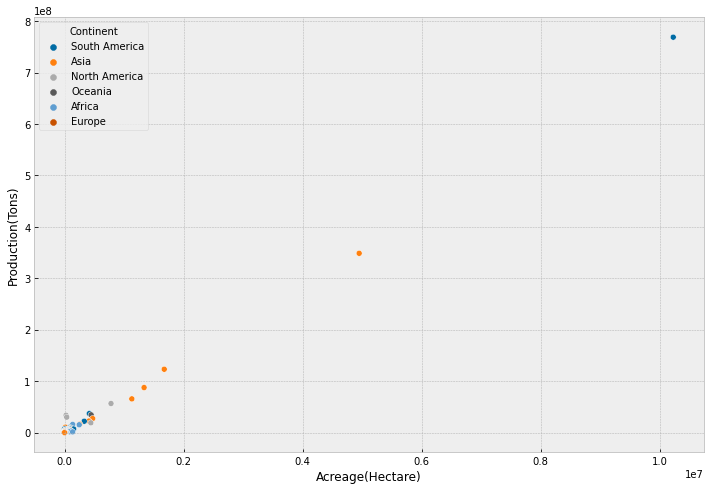

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )
plt.show();

**Increase in available land for cultivation leads to increase in production**

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<AxesSubplot:xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

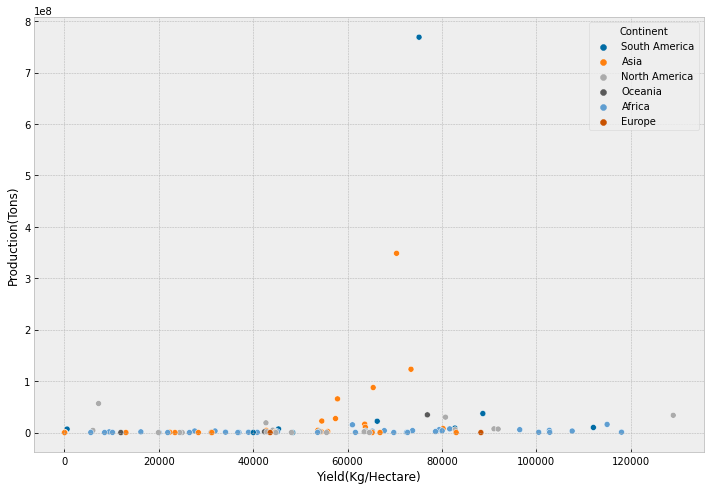

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

**Production is not dependent on Yield per hectare of a country**

## Do continent with highest land produces more sugarcane?

In [46]:
df_continent = data.groupby("Continent").sum()
df_continent["number_of_countries"] = data.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


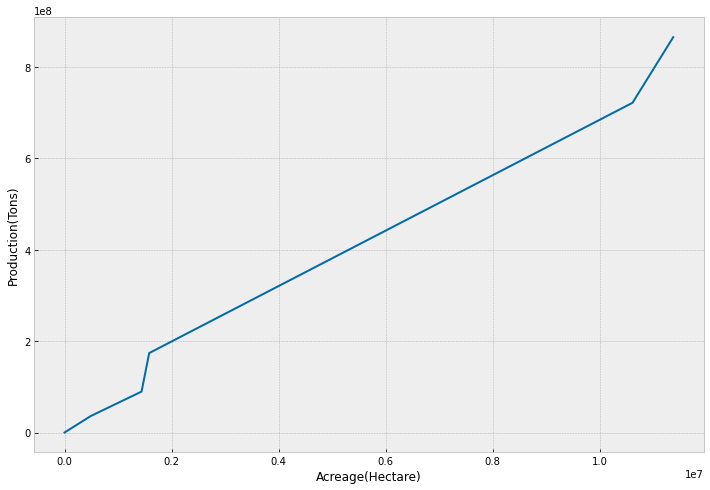

In [48]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )
plt.show();

### Do number of countries in a Continent effects production of sugarcane?

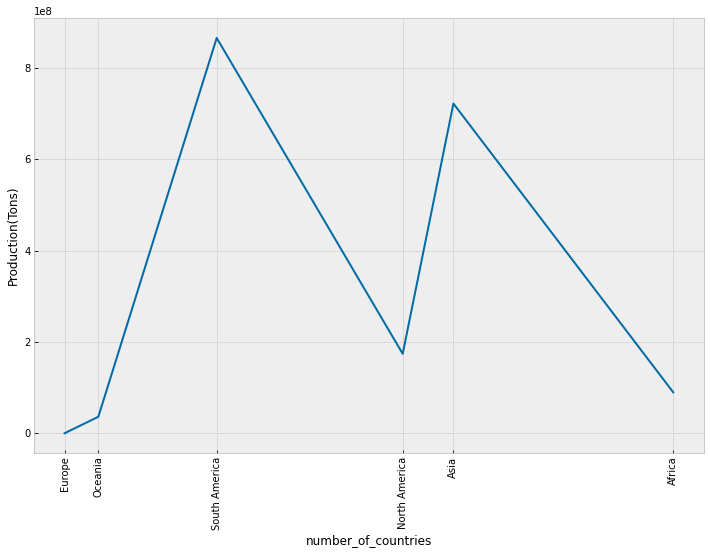

In [51]:
plt.figure(figsize=(12,8))
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show();